# Guided Capstone Step 4 - Pre-processing and Training Data Development

### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   **Pre-processing and Training Data Development**

5.  Modeling
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In this step of the guided capstone, you'll revisit some of the steps you completed to solve questions in step 4. Revisiting these steps will help you get additional practice completing this kind of work.

**<font color='teal'> Start by loading the necessary packages, as you've done in the previous steps. Print out your current working directory to confirm that you are in the correct project directory. </font>**

In [389]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import empiricaldist as ed
from scipy.stats import norm
from math import sqrt

%matplotlib inline
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)


C:\Users\Tiki\Documents\Sprinboard2\Guided_Capstone
['.ipynb_checkpoints', '1582673871_updated_ski_data.csv.zip', 'data', 'figures', 'GuidedCapstoneStep6 (1).ipynb', 'GuidedCapstone_Steps4and5.ipynb', 'models', 'Notebook_stepfourandfive.ipynb', 'Notebook_stepthree.ipynb', 'Notebook_steptwo.ipynb', 'Notebook_steptwov2.ipynb', 'Ski_Lift_Problem_Statementsheet.pptx', 'step2_output.csv', 'step3_output.csv', 'updated_ski_data.csv', '__MACOSX']


**<font color='teal'>  Load the csv file you created in step 3. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [390]:
# load csv data
file ='step3_output.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
ski_data= pd.read_csv(file_name_path)
print(ski_data.dtypes)
ski_data.head(5)


Name                  object
state                 object
summit_elev            int64
vertical_drop        float64
trams                  int64
fastSixes            float64
fastQuads            float64
quad                 float64
triple               float64
double               float64
surface              float64
total_chairs         float64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
clusters               int64
dtype: object


,Name,state,summit_elev,vertical_drop,trams,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,Alaska,2090,294.0,0,0.0,0.0,0.0,1.0,0.0,...,30.0,30.0,150.0,36.0,69.0,30.000000,34.00000,152.0,30.0,1
1,Arizona Snowbowl,Arizona,11500,2300.0,0,1.0,0.0,2.0,2.0,1.0,...,777.0,104.0,122.0,81.0,260.0,89.000000,89.00000,122.0,0.0,0
2,Sunrise Park Resort,Arizona,11100,1800.0,0,0.0,1.0,2.0,3.0,1.0,...,800.0,80.0,115.0,49.0,250.0,74.000000,78.00000,104.0,80.0,0
3,Yosemite Ski & Snowboard Area,California,7800,600.0,0,0.0,0.0,0.0,1.0,3.0,...,88.0,0.0,110.0,84.0,300.0,47.000000,47.00000,107.0,0.0,0
4,Bear Valley,California,8500,1900.0,0,1.0,1.0,0.0,2.0,4.0,...,1680.0,100.0,165.0,52.0,359.0,57.916957,64.16681,151.0,0.0,0


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `State`. Add the dummies back to the dataframe and remove the original column for `State`. </font>**

In [391]:
#dfo=df.select_dtypes(include=['object']) # select object type columns
#df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

# Create a set of dummy variables from the state variable
popped_state = ski_data['state']
ski_data = pd.concat([ski_data.drop(columns=['state']), pd.get_dummies(ski_data, columns=['state'])], axis=1)
ski_data.head()

,Name,summit_elev,vertical_drop,trams,fastSixes,fastQuads,quad,triple,double,surface,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Hilltop Ski Area,2090,294.0,0,0.0,0.0,0.0,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,Arizona Snowbowl,11500,2300.0,0,1.0,0.0,2.0,2.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,Sunrise Park Resort,11100,1800.0,0,0.0,1.0,2.0,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Yosemite Ski & Snowboard Area,7800,600.0,0,0.0,0.0,0.0,1.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,Bear Valley,8500,1900.0,0,1.0,1.0,0.0,2.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [392]:
#dummy cluster
ski_data = pd.concat([ski_data.drop(columns=['clusters']), pd.get_dummies(ski_data, columns=['clusters'])], axis=1)

#drop name
name_popped = ski_data.pop('Name')

#drop duplicate columns
ski_data = ski_data.T.drop_duplicates().T

print(ski_data.columns.T)
ski_data.head()
    


Index(['summit_elev', 'vertical_drop', 'trams', 'fastSixes', 'fastQuads',
       'quad', 'triple', 'double', 'surface', 'total_chairs', 'Runs',
       'TerrainParks', 'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac', 'state_Alaska',
       'state_Arizona', 'state_California', 'state_Colorado',
       'state_Connecticut', 'state_Idaho', 'state_Illinois', 'state_Indiana',
       'state_Iowa', 'state_Maine', 'state_Maryland', 'state_Massachusetts',
       'state_Michigan', 'state_Minnesota', 'state_Missouri', 'state_Montana',
       'state_Nevada', 'state_New Hampshire', 'state_New Jersey',
       'state_New Mexico', 'state_New York', 'state_North Carolina',
       'state_Ohio', 'state_Oregon', 'state_Pennsylvania',
       'state_Rhode Island', 'state_South Dakota', 'state_Tennessee',
       'state_Utah', 'state_Vermont', 'state_Virginia', 'state_W

,summit_elev,vertical_drop,trams,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,...,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,clusters_0,clusters_1,clusters_2
0,2090.0,294.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11500.0,2300.0,0.0,1.0,0.0,2.0,2.0,1.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,11100.0,1800.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7800.0,600.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8500.0,1900.0,0.0,1.0,1.0,0.0,2.0,4.0,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing, standardize the scale of the features of the dataframe except the name of the resort, which you don't need in the dataframe for modeling so it can be droppped here as well. You should  hold out your response variable(s) so that you can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as your response for scaling and modeling. Later, you will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave, them in the development dataframe. </font>**

In [393]:
# hold out the response variables for later use
response_mult = ski_data[['daysOpenLastYear', 'AdultWeekend' ,'AdultWeekday', 'projectedDaysOpen']]

#just for adult weekend
response=['AdultWeekend']

#orignally explain variable did not include any from response but it did not give any of the correct numbers

explain =list(set(ski_data.columns)-set(response))
ski_data_resp=ski_data[response]
ski_data_trial_presc=ski_data[explain]


# import preprocessing sklearn
from sklearn.preprocessing import MaxAbsScaler 

scaler = MaxAbsScaler()

#make copy of data so we can trsnform it
ski_data_trial = ski_data_trial_presc.copy()
    
#standardize the magnitute (maxabs) for explanatory data
for columnName, columnData in ski_data_trial_presc.iteritems():
    ski_data_trial[columnName] = scaler.fit_transform(columnData.values.reshape(-1, 1))

    
#drop duplicate columns
ski_data_trial = ski_data_trial.T.drop_duplicates().T


ski_data_trial.shape

(184, 59)

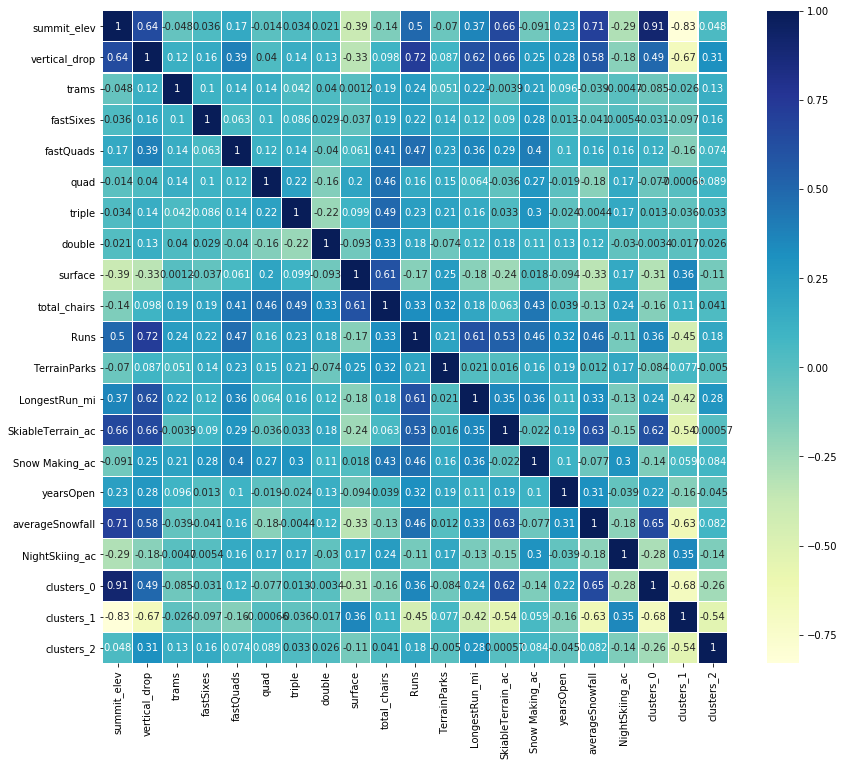

In [394]:
#repeating heat matrix
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
ski_data2 = ski_data.loc[:, ~ski_data.columns.str.startswith('state')]
z = ski_data2.drop(['daysOpenLastYear', 'AdultWeekend' ,'AdultWeekday', 'projectedDaysOpen'], axis =1)
sns.heatmap(z.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selectionm import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. You will start by using the adult weekend ticket price as your response variable for modeling.</font>**

In [395]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(ski_data_trial , ski_data_resp, test_size=0.25, random_state=0)




Here, you'll start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

# Guided Capstone Step 5 - Modeling

You've cleaned and prepared the datasets, so now it's time to get into the most exciting part of this process: modeling! In this exercise, you will build three different models and compare each model's performance. In the end, you will choose the best model for proving insights to Big Mountain management.  

1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with Training Data Set

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [396]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
lin_model = lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
lin_model_coef = {}


for idx, col_name in enumerate(X_train.columns):
    lin_model_coef[col_name] = lm.coef_[0][idx]
coef_table =pd.DataFrame(lin_model_coef.items(), columns=['variable', 'coefficent'])


**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

In [397]:

lin_model_expl_var = explained_variance_score(y_test, y_pred)
lin_model_me = mean_absolute_error(y_test, y_pred)
lin_model_rsq = r2_score(y_test, y_pred)
print('The Rsq of the linear model = {} and the Mean Absolute Error = {}'.format(lin_model_rsq, lin_model_me))


The Rsq of the linear model = 0.7951850215003873 and the Mean Absolute Error = 5.501170045112423


## Review Model Outcomes — Iterate over additional models as needed.

In [398]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()


def test(models, X_train1, X_test1, y_train1, y_test1, iterations = 100):
    results = {}

    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
linmodels1_test = test(models, X_train, X_test, y_train, y_test)
print(linmodels1_test)

        OLS     Lasso     Ridge
0  0.902773  0.633539  0.870837
1  0.795185  0.650093  0.793346


**<font color='teal'> Print the intercept value from the linear model. </font>**

In [399]:
lin_model.intercept_[0]

15.385391071394395

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the `AdultWeekend` resulting value. Also, because you took the time to scale your x values in the training data, you can compare each of the coefficients for the features to determine the feature's importance. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 

Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what you are looking for is the magnitude of impact on your response variable.

In [400]:

coef_table['abs_coef']= abs(coef_table.coefficent)
coef_table= coef_table.sort_values(by='abs_coef', ascending= False)
coef_table



,variable,coefficent,abs_coef
37,AdultWeekday,59.407397,59.407397
57,state_Tennessee,23.444981,23.444981
40,state_North Carolina,15.650506,15.650506
47,state_West Virginia,14.609872,14.609872
22,state_Montana,-12.471860,12.471860
38,state_Wyoming,-11.657153,11.657153
25,state_Maryland,10.744197,10.744197
48,state_Idaho,-10.707526,10.707526
54,vertical_drop,10.168084,10.168084
12,state_New Mexico,-10.163387,10.163387


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that you care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

#### Model 2

In [401]:
#drop state
ski_data_trial2 = ski_data_trial.loc[:, ~ski_data_trial.columns.str.startswith('state')]

In [402]:

#rerun model excluding state variable
y = ski_data.AdultWeekend
X_train, X_test, y_train, y_test = train_test_split(ski_data_trial2 , y, test_size=0.25, random_state=0)
lm = linear_model.LinearRegression()
lin_model2 = lm.fit(X_train,y_train)
y_pred2 = lm.predict(X_test)
c = lm.coef_

#create Coefficent table
lin_model_coef2 = {}



for idx, col_name in enumerate(X_train.columns):
    lin_model_coef2[col_name] = c[idx]
    #lin_model_coef2[col_name] = c[0][idx]   
coef_table2 =pd.DataFrame(lin_model_coef2.items(), columns=['variable', 'coefficent'])

#stats_new_model
#intercept = lin_model2.intercept_[0]
intercept2 = lin_model2.intercept_

lin_model2_Rsq = explained_variance_score(y_test, y_pred2)
lin_model2_me = mean_absolute_error(y_test, y_pred2)
print('When state dummy variables are removed the Rsq of the linear model = {} and the Mean Absolute Error = {}'.format(lin_model2_Rsq, lin_model2_me))

linmodels2_test = test(models, X_train, X_test, y_train, y_test)

print('R2 for linear models that have state dummy variables')
print(linmodels1_test)

print('R2 for linear models that do not have state dummy variables')
print(linmodels2_test)


When state dummy variables are removed the Rsq of the linear model = 0.8085448065730979 and the Mean Absolute Error = 5.2376883741102676
R2 for linear models that have state dummy variables
        OLS     Lasso     Ridge
0  0.902773  0.633539  0.870837
1  0.795185  0.650093  0.793346
R2 for linear models that do not have state dummy variables
        OLS     Lasso     Ridge
0  0.824404  0.633539  0.796319
1  0.807982  0.650093  0.798427


In [403]:
coef_table2['abs_coef']= abs(coef_table2.coefficent)
coef_table2= coef_table2.sort_values(by='abs_coef', ascending= False)
coef_table2

,variable,coefficent,abs_coef
16,AdultWeekday,65.640001,65.640001
15,projectedDaysOpen,-12.618538,12.618538
12,daysOpenLastYear,10.658958,10.658958
3,summit_elev,8.402825,8.402825
19,clusters_0,-8.115672,8.115672
21,vertical_drop,6.546345,6.546345
9,clusters_2,5.972058,5.972058
14,trams,-5.516990,5.516990
7,Runs,5.377395,5.377395
11,quad,3.675115,3.675115


**<font color='teal'> When reviewing your new model coefficients, note that `summit_elev` is now in the number two spot. From a managerial perspective, this is also difficult to change and highly correlated with `base_elev` and `vertical_drop`.  This time rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [404]:
ski_data_trial3 = ski_data_trial2.drop(['summit_elev'], axis =1)

#rerun model excluding state variable
y = ski_data.AdultWeekend
X_train, X_test, y_train, y_test = train_test_split(ski_data_trial3 , y, test_size=0.25, random_state=0)
lm = linear_model.LinearRegression()
lin_model3 = lm.fit(X_train,y_train)
y_pred3 = lm.predict(X_test)

#create Coefficent table
lin_model_coef3 = {}
for idx, col_name in enumerate(X_train.columns):
    lin_model_coef3[col_name] = lm.coef_[idx]
    #if above line generates error try line below
    #lin_model_coef3[col_name] = lm.coef_[0][idx]  
coef_table3 =pd.DataFrame(lin_model_coef3.items(), columns=['variable', 'coefficent'])

#stats_new_model
intercept_3= lin_model3.intercept_
#if above line generates error try line below
#lin_model3.intercept_[0]

lin_model3_Rsq = explained_variance_score(y_test, y_pred3)
lin_model3_me = mean_absolute_error(y_test, y_pred3)
print('When state dummy variables are removed the Rsq of the linear model = {} and the Mean Absolute Error = {}'.format(lin_model3_Rsq, lin_model3_me))

linmodels3_test = test(models, X_train, X_test, y_train, y_test)

print('R2 for linear models that have state dummy variables')
print(linmodels1_test)

print('R2 for linear models that do not have state dummy variables')
print(linmodels2_test)


print('R2 for linear models that do not have state dummy variables and summit elev')
print(linmodels3_test)

When state dummy variables are removed the Rsq of the linear model = 0.8068757847137217 and the Mean Absolute Error = 5.233642982418209
R2 for linear models that have state dummy variables
        OLS     Lasso     Ridge
0  0.902773  0.633539  0.870837
1  0.795185  0.650093  0.793346
R2 for linear models that do not have state dummy variables
        OLS     Lasso     Ridge
0  0.824404  0.633539  0.796319
1  0.807982  0.650093  0.798427
R2 for linear models that do not have state dummy variables and summit elev
        OLS     Lasso     Ridge
0  0.823108  0.633539  0.795060
1  0.806762  0.650093  0.798404


## Identify the Final Model

In [405]:
print('The Rsq of the linear model = {} and the Mean Absolute Error = {}'.format(lin_model_rsq, lin_model_me))
print('When state dummy variables are removed the Rsq of the linear model = {} and the Mean Absolute Error = {}'.format(lin_model2_Rsq, lin_model2_me))
print('When state dummy variables are removed the Rsq of the linear model = {} and the Mean Absolute Error = {}'.format(lin_model3_Rsq, lin_model3_me))


The Rsq of the linear model = 0.7951850215003873 and the Mean Absolute Error = 5.501170045112423
When state dummy variables are removed the Rsq of the linear model = 0.8085448065730979 and the Mean Absolute Error = 5.2376883741102676
When state dummy variables are removed the Rsq of the linear model = 0.8068757847137217 and the Mean Absolute Error = 5.233642982418209


**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell. You will explain your selection during the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0.7951850215003873 | 5.501170045112423  |-|
| Model 2. | 0.8085448065730979 | 5.237688374110267  |'state'|
| Model 3. | 0.8068757847137217 | 5.233642982418209 |'state','summit_elev','base_elev'|

Model Selection: Model3